In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import PIL
from pydub import AudioSegment

In [9]:
def file_to_mel_spectrum(file_path):  
    wav = AudioSegment.from_wav(file_path)
    wav = np.array(wav.get_array_of_samples()).astype(np.float32)
    # TODO: better model than ordinary spectrogram?
    S = librosa.feature.melspectrogram(wav, sr=16000, n_mels=128)
    return librosa.power_to_db(S, ref=np.max)

def show_spectrum(log_S, title):
    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=16000, x_axis='time', y_axis='mel')

    # Put a descriptive title on the plot
    plt.title(title)

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

In [12]:
def audio_files_to_spectrogram_image_files(source_dir, dest_dir):
    for audio_filename in os.listdir(source_dir):
        audio_path = os.path.join(source_dir, audio_filename)
        image_filename = '{}.png'.format(os.path.splitext(audio_filename)[0])
        image_path = os.path.join(dest_dir, image_filename)

        spectrum = file_to_mel_spectrum(audio_path)
        image = PIL.Image.fromarray(spectrum)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        image.save(image_path)

spectrogram_directory = 'feather_spectrograms'
if not os.path.exists(spectrogram_directory):
    os.makedirs(spectrogram_directory)
# audio_files_to_spectrogram_image_files('feather_sound_recordings', spectrogram_directory)

In [7]:
feather_spectrum = file_to_mel_spectrum('feather_sound_recordings/feather_74_t_1.wav')
other_words_spectrum = file_to_mel_spectrum('feather_sound_recordings/noise_77_t_1.wav')
white_noise_spectrum = file_to_mel_spectrum('feather_sound_recordings/noise_28_t_1.wav')

'/home/jupyter/tutorials/fastai/fastai-deep-learning-2019/01_image_classification'

In [ ]:
# import IPython
# IPython.display.Audio("feather_sound_recordings/feather_74_t_1.wav", autoplay=True)

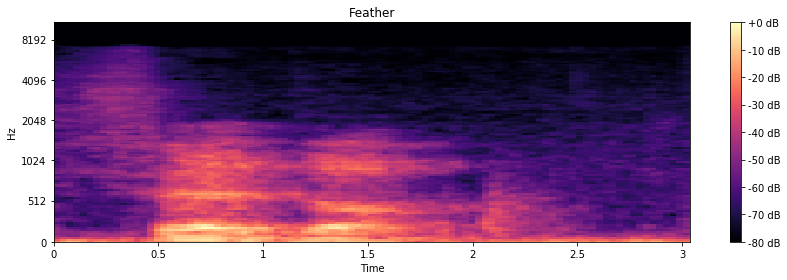

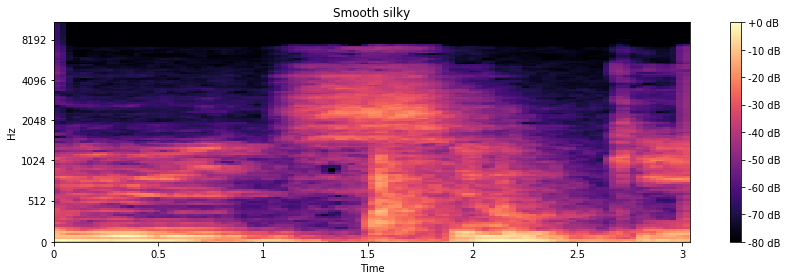

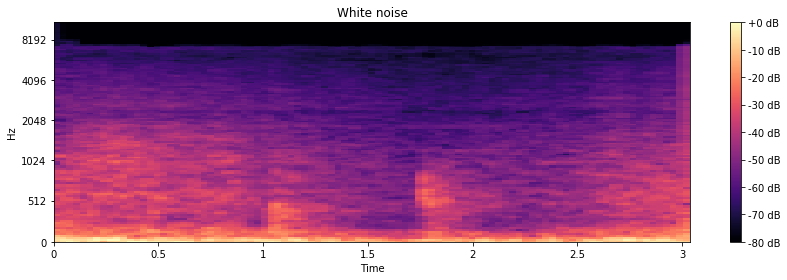

In [25]:
show_spectrum(feather_spectrum, 'Feather')
show_spectrum(other_words_spectrum, 'Smooth silky')
show_spectrum(white_noise_spectrum, 'White noise')

## Appendix - processing sound with scipy (getting bad spectra)

In [2]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [7]:
sample_rate, samples = wavfile.read('feather_sound_recordings/feather_74_t_1.wav')

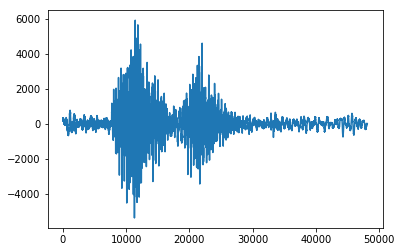

In [13]:
plt.plot(samples)

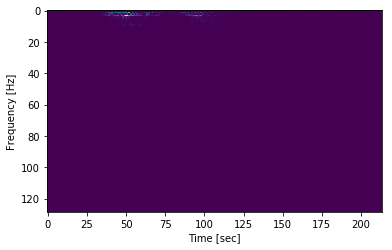

In [8]:
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()